# goals
* explore the mismatch between lensed, RP and NP waveforms
* explore the conditions for indistinguishable waveforms

# get libraries ready

In [4]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver0 import *
from modules.default_params_ver0 import *
from modules.functions_ver0 import *

# lensing vs precessing examples

In [ ]:
lensing_params, RP_params, NP_params = set_to_params(
    lensing_params_0, RP_params_0, NP_params_0
)

In [13]:
def h_comparison(sky_locs_J, sky_locs_S):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for (theta_J, phi_J), (theta_S, phi_S) in zip(sky_locs_J, sky_locs_S):
        # set both lensed and precessing to same location
        lensing_params["theta_L"] = RP_params["theta_J"] = theta_J
        lensing_params["phi_L"] = RP_params["phi_J"] = phi_J
        lensing_params["theta_S"] = RP_params["theta_S"] = theta_S
        lensing_params["phi_S"] = RP_params["phi_S"] = phi_S

        # plot lensed waveform
        MLz = 1000
        mcz = 50
        lensing_params["MLz"] = MLz * solar_mass
        lensing_params["mcz"] = mcz * solar_mass

        lensing_inst = LensingGeo(lensing_params)
        f_cut = lensing_inst.f_cut()
        f_min = 20
        f_range = np.linspace(f_min, f_cut, 10000)
        amp_fact = lensing_inst.F(f_range)
        unlensed_strain = lensing_inst.hI(f_range)
        lensed_strain = amp_fact * unlensed_strain

        axes[0].loglog(f_range, np.abs(lensed_strain))
        axes[0].set_xlabel("f")
        axes[0].set_ylabel("|h|")
        axes[0].set_title(
            "Lensed with {} = {} & {} = {}".format(r"$M_{Lz}$", MLz, r"$m_{cz}$", mcz)
        )

        # plot precessing waveform
        mcz = 50
        RP_params["mcz"] = mcz * solar_mass

        RP_inst = Precessing(RP_params)
        f_cut = RP_inst.f_cut()
        f_min = 20
        delta_f = 0.05
        f_range = np.arange(f_min, f_cut, delta_f)
        RP_strain = RP_inst.strain(f_range)

        axes[1].loglog(
            f_range,
            np.abs(RP_strain),
            label=r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            ),
        )
        axes[1].set_xlabel("f")
        axes[1].set_ylabel("|h|")
        axes[1].set_title("RP with {} = {}".format(r"$m_{cz}$", mcz))

    # set a legend for the entire panel
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.0)

In [14]:
def phase_diff_L_RP(sky_locs_J, sky_locs_S):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for (theta_J, phi_J), (theta_S, phi_S) in zip(sky_locs_J, sky_locs_S):
        # set both lensed and precessing to same location
        lensing_params["theta_L"] = RP_params["theta_J"] = theta_J
        lensing_params["phi_L"] = RP_params["phi_J"] = phi_J
        lensing_params["theta_S"] = RP_params["theta_S"] = theta_S
        lensing_params["phi_S"] = RP_params["phi_S"] = phi_S

        # plot phase diff between lensed and precessing waveforms
        MLz = 1000
        mcz = 50

        lensing_params["MLz"] = MLz * solar_mass
        lensing_params["mcz"] = mcz * solar_mass
        lensing_inst = LensingGeo(lensing_params)
        f_cut = lensing_inst.f_cut()
        f_min = 20
        f_range = np.linspace(f_min, f_cut, 10000)
        amp_fact = lensing_inst.F(f_range)
        unlensed_strain = lensing_inst.hI(f_range)
        lensed_strain = amp_fact * unlensed_strain
        phase_L = np.unwrap(np.angle(lensed_strain))

        RP_params["mcz"] = mcz * solar_mass
        RP_inst = Precessing(RP_params)
        RP_strain = RP_inst.strain(f_range)
        phase_RP = np.unwrap(np.angle(RP_strain))

        phase_diff = phase_L - phase_RP
        phase_diff = phase_diff - phase_diff[0]  # set the initial phase diff to 0

        axes.plot(
            f_range,
            phase_diff,
            label=r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            ),
        )
        axes.set_xlabel("f")
        axes.set_ylabel("Phase diff")
        axes.set_title(
            "Phase diff between Lensed and RP with {} = {} & {} = {}".format(
                r"$M_{Lz}$", MLz, r"$m_{cz}$", mcz
            )
        )
        axes.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.0)

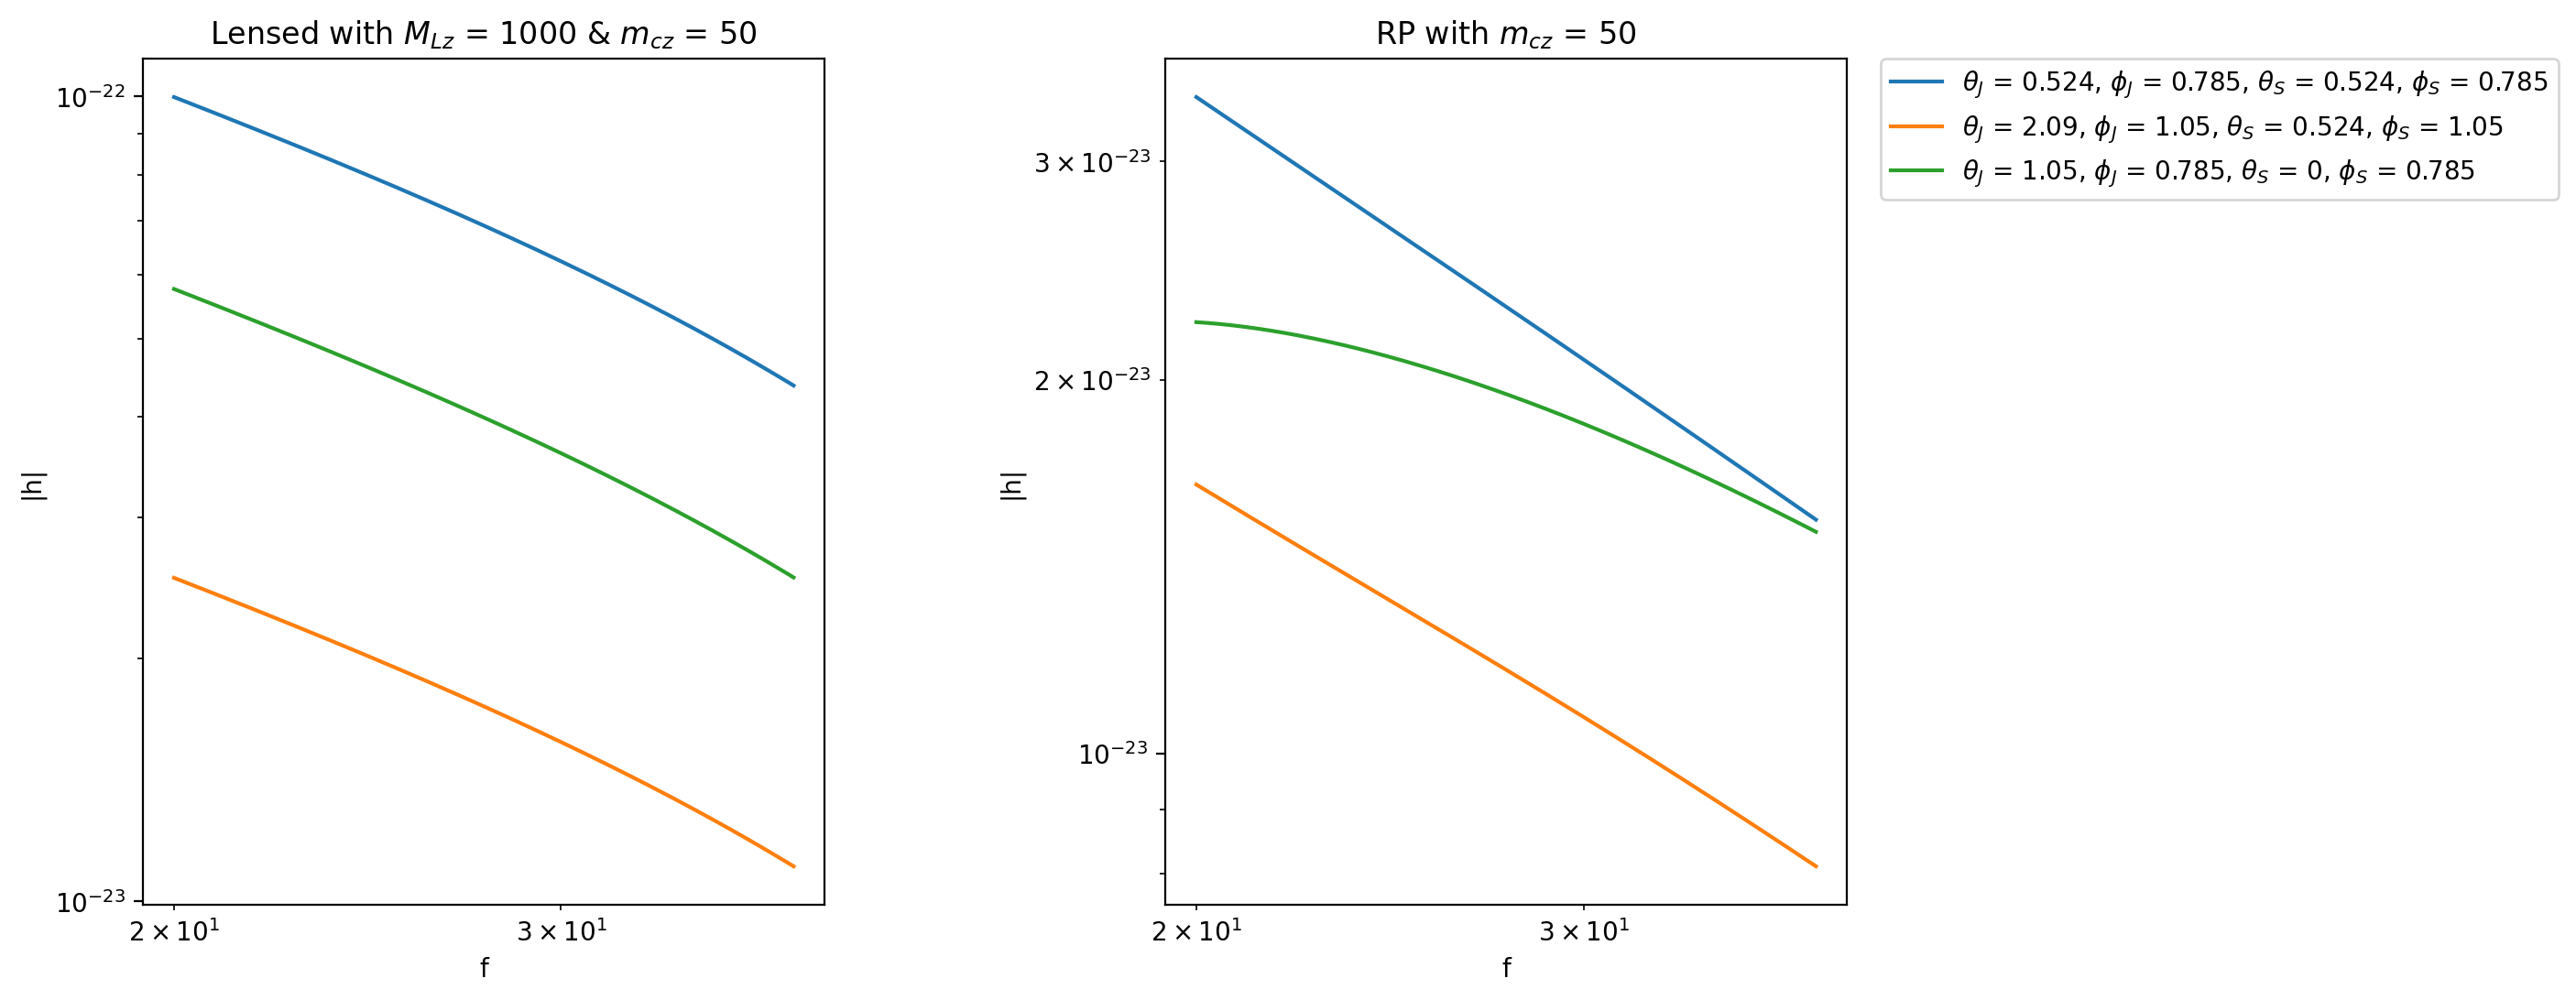

In [15]:
lensing_params, RP_params = set_to_params(lensing_params_0, RP_params_0)

# using Saif's choice of sky locations
h_comparison(sky_locs_J_S, sky_locs_S_S)

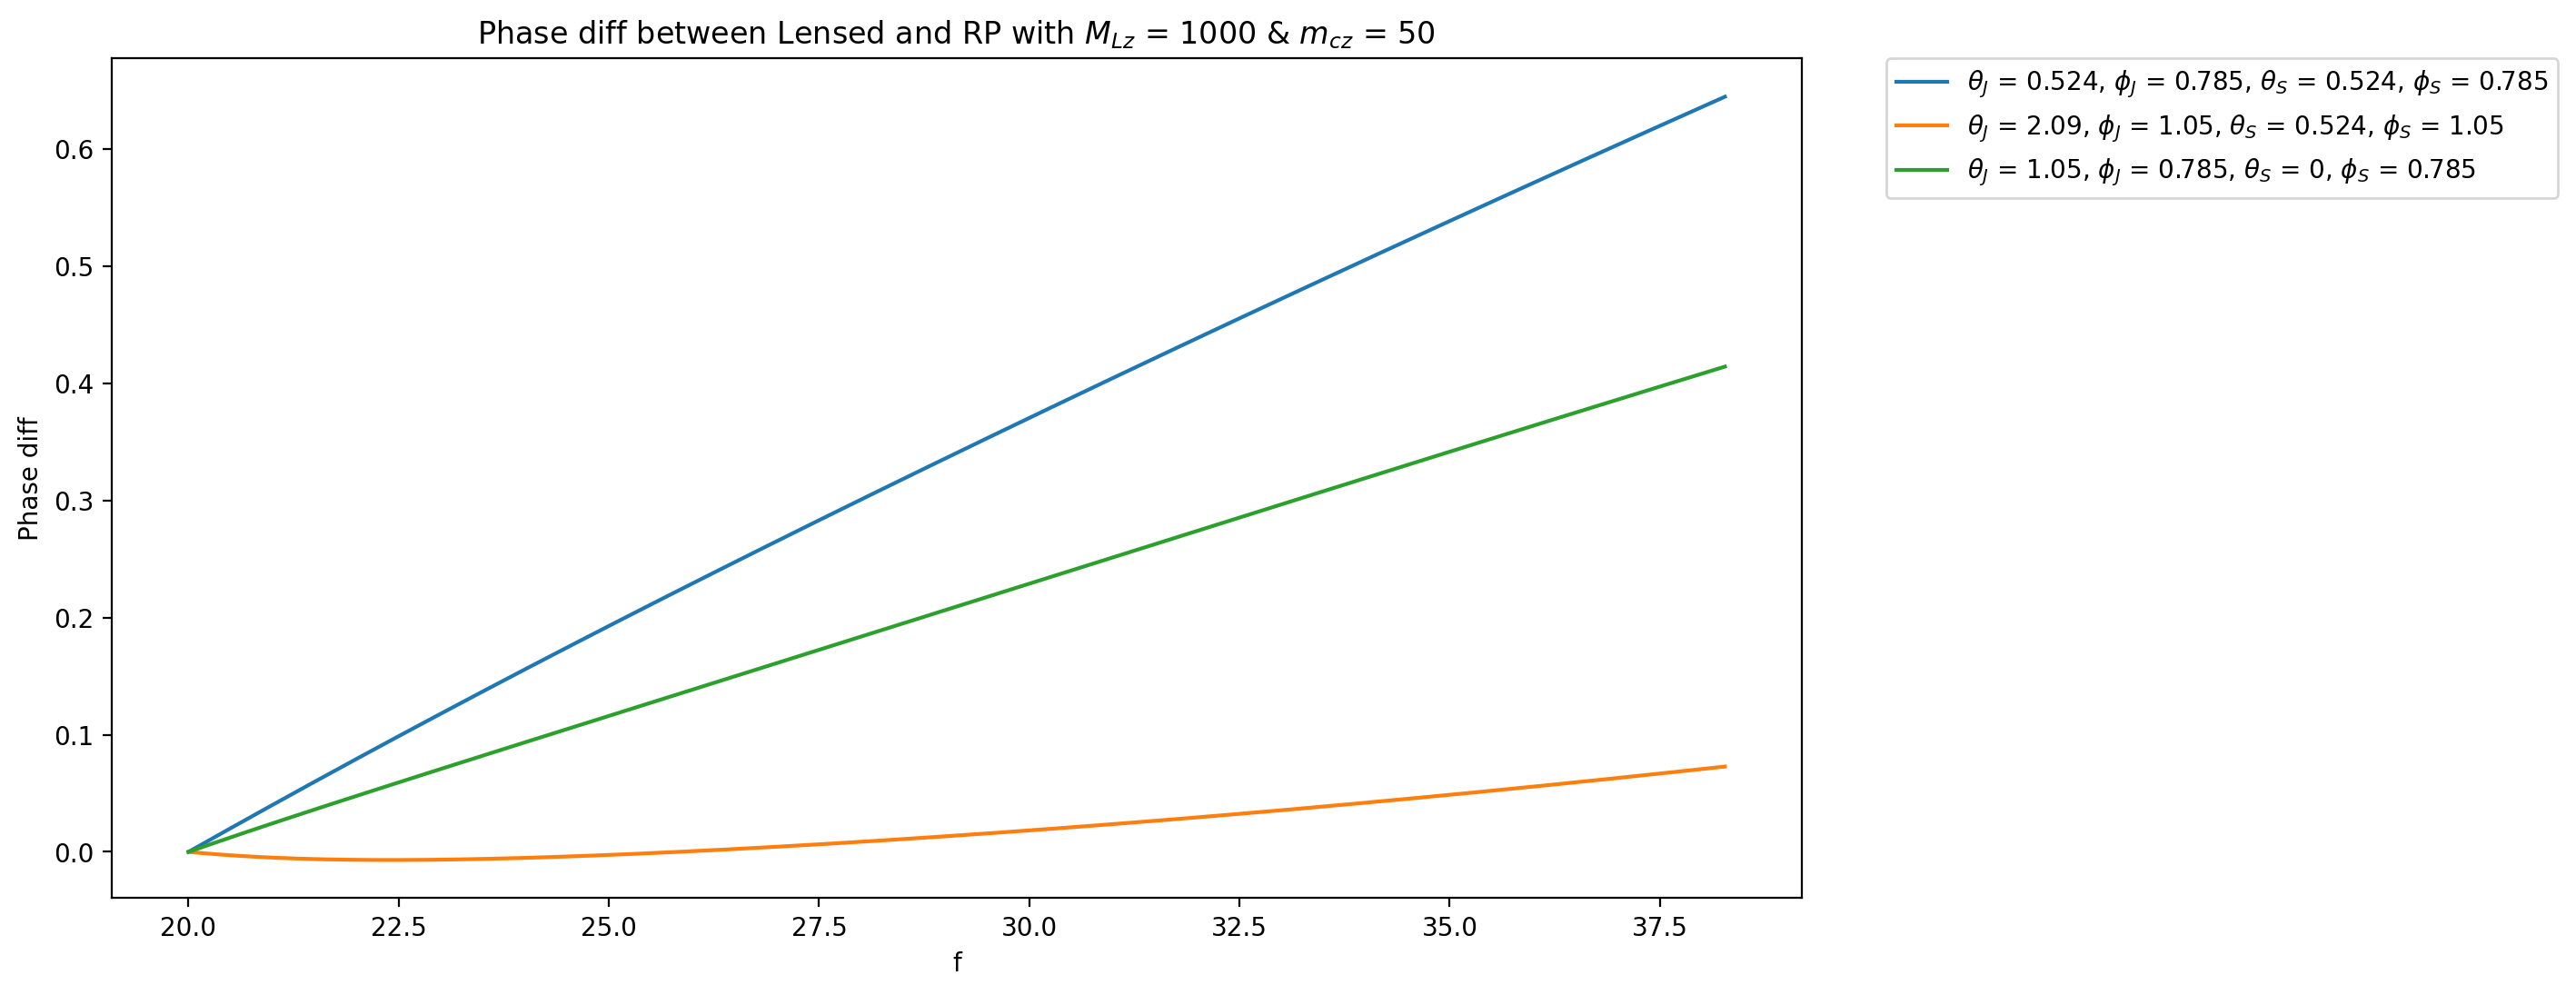

In [16]:
lensing_params, RP_params = set_to_params(lensing_params_0, RP_params_0)

# using Saif's choice of sky locations
phase_diff_L_RP(sky_locs_J_S, sky_locs_S_S)

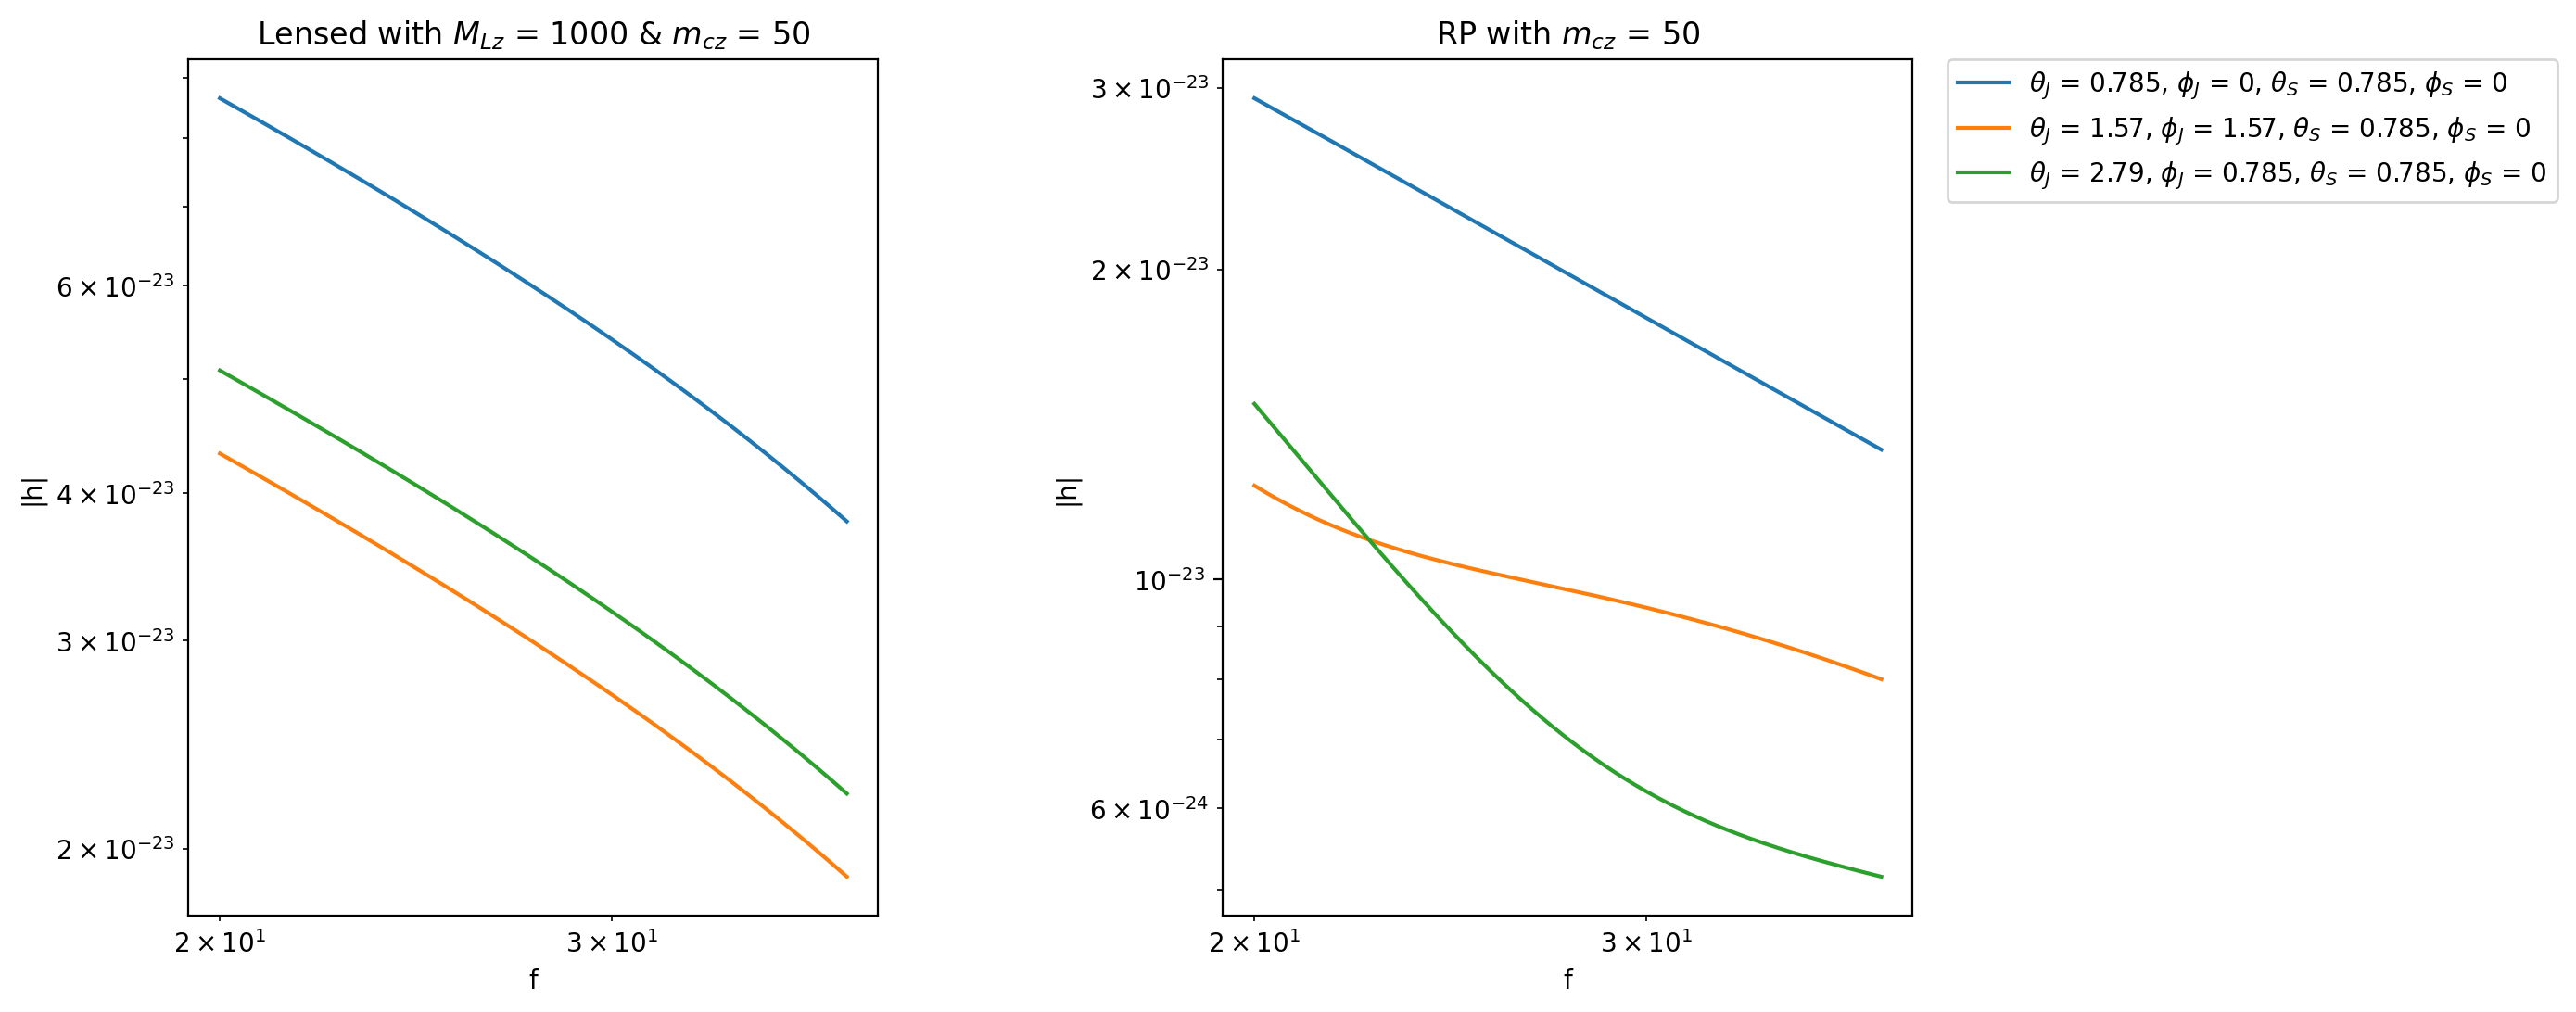

In [17]:
lensing_params, RP_params = set_to_params(lensing_params_0, RP_params_0)

# using Evangelos's choice of sky locations
h_comparison(sky_locs_J_E, sky_locs_S_E)

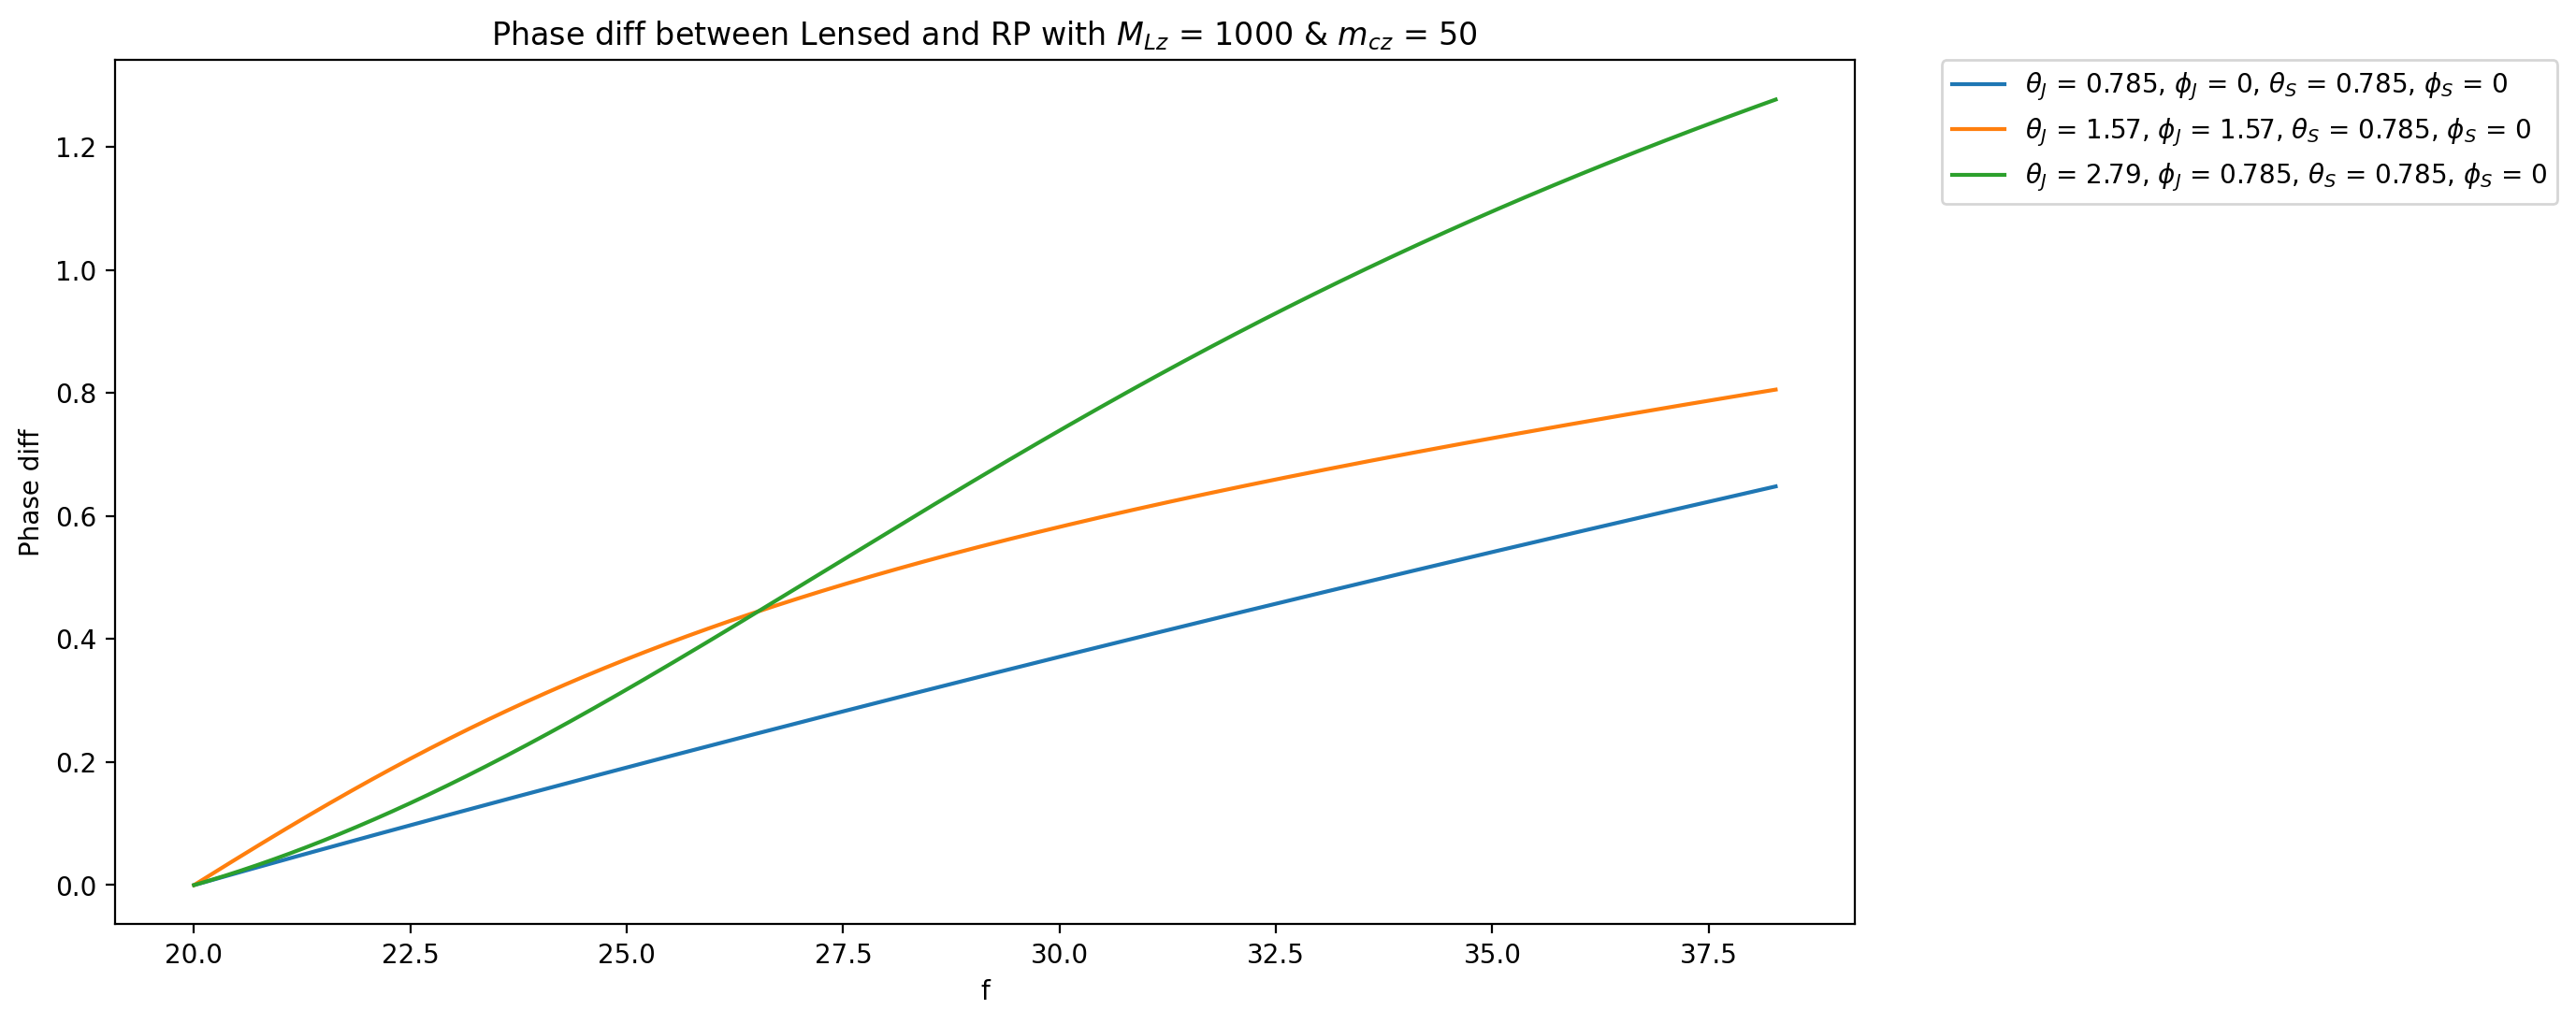

In [18]:
lensing_params, RP_params = set_to_params(lensing_params_0, RP_params_0)

# using Evangelos's choice of sky locations
phase_diff_L_RP(sky_locs_J_E, sky_locs_S_E)

In [68]:
def h_comparison_all(sky_locs_J, sky_locs_S):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, ((theta_J, phi_J), (theta_S, phi_S)) in enumerate(
        zip(sky_locs_J, sky_locs_S)
    ):
        # set lensed, RP, and NP to same location
        lensing_params["theta_L"] = RP_params["theta_J"] = NP_params["theta_J"] = (
            theta_J
        )
        lensing_params["phi_L"] = RP_params["phi_J"] = NP_params["phi_J"] = phi_J
        lensing_params["theta_S"] = RP_params["theta_S"] = NP_params["theta_S"] = (
            theta_S
        )
        lensing_params["phi_S"] = RP_params["phi_S"] = NP_params["phi_S"] = phi_S

        # plot lensed waveform
        lensing_inst = LensingGeo(lensing_params)
        f_min = 20
        f_cut_L = lensing_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lensing_inst.strain(f_range_L)

        axes[r].loglog(f_range_L, np.abs(lensed_strain), label="L")

        # plot precessing waveform
        RP_inst = Precessing(RP_params)
        f_cut_RP = RP_inst.f_cut()
        f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
        RP_strain = RP_inst.strain(f_range_RP)

        axes[r].loglog(f_range_RP, np.abs(RP_strain), label="RP")

        # plot non-precessing waveform
        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)

        axes[r].loglog(f_range_NP, np.abs(NP_strain), label="NP")

        axes[r].set_xlabel("f")
        axes[r].set_ylabel("|h|")
        axes[r].set_title(
            r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            )
        )
        axes[r].legend()

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_22604/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


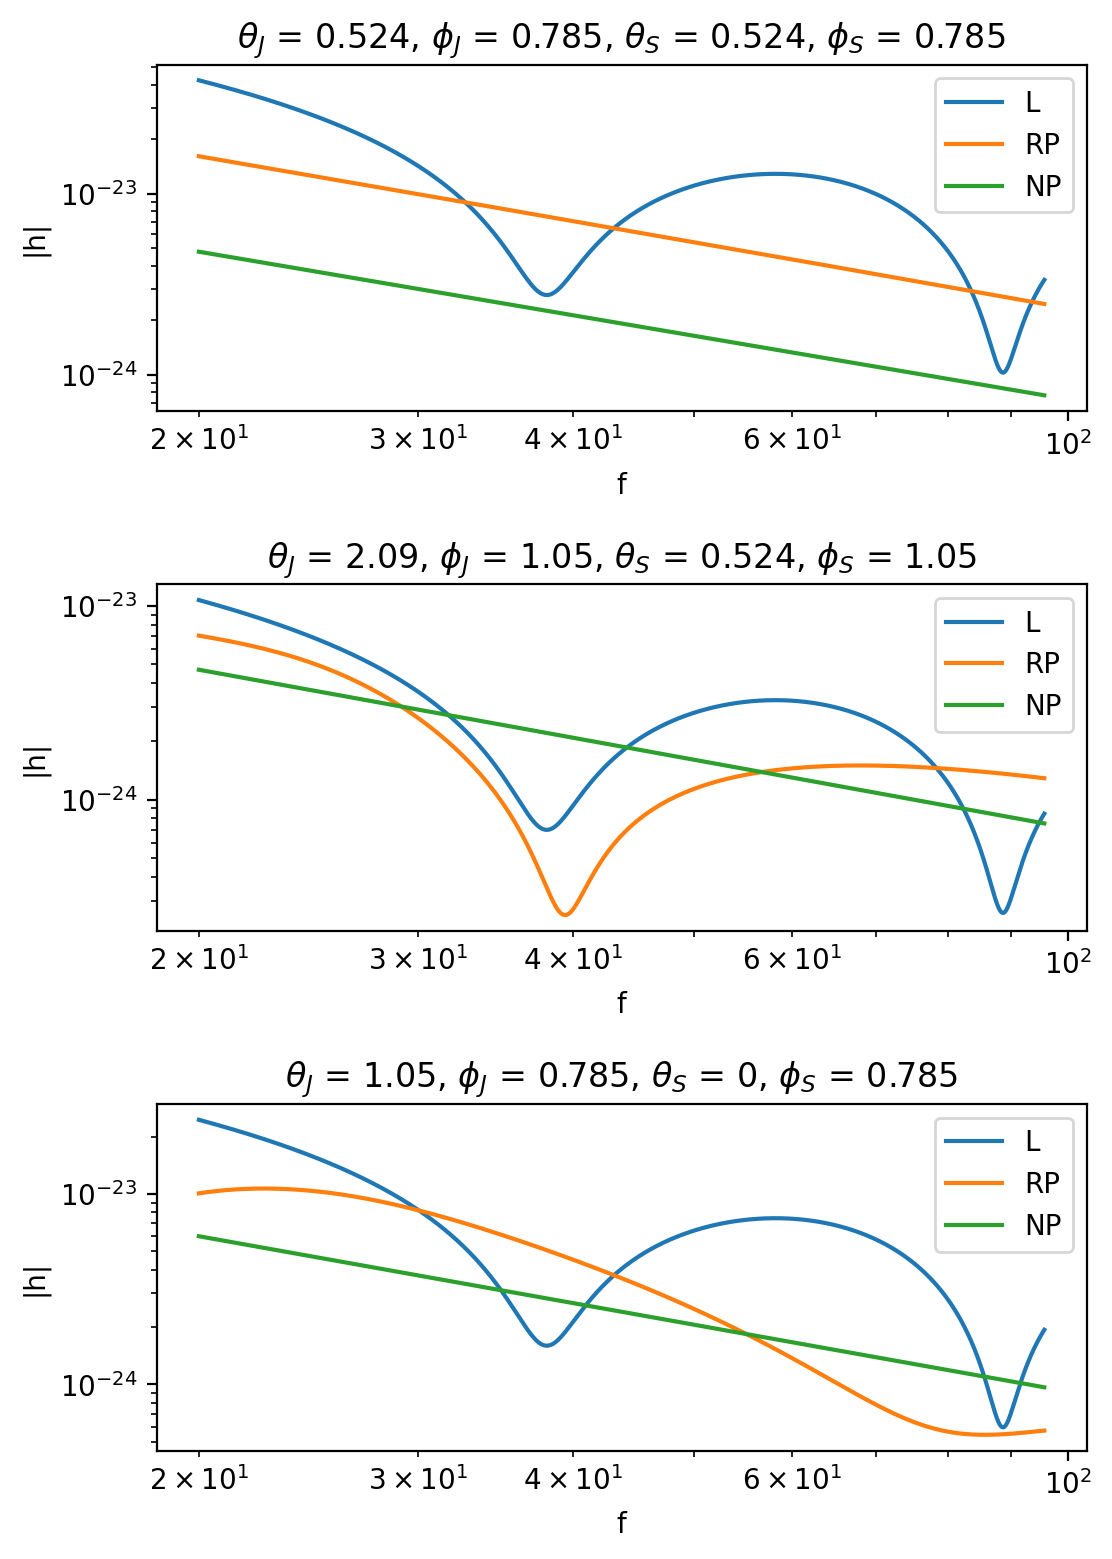

In [69]:
lensing_params, RP_params, NP_params = set_to_params(
    lensing_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
mcz = 20
MLz = 2000
lensing_params["MLz"] = MLz * solar_mass
lensing_params["mcz"] = mcz * solar_mass
RP_params["mcz"] = mcz * solar_mass
NP_params["mcz"] = mcz * solar_mass

# using Saif's choice of sky locations
h_comparison_all(sky_locs_J_S, sky_locs_S_S)

In [70]:
# phase diff between L & RP, L & NP, RP & NP for each sky location


def phase_diff_all(sky_locs_J, sky_locs_S):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, ((theta_J, phi_J), (theta_S, phi_S)) in enumerate(
        zip(sky_locs_J, sky_locs_S)
    ):
        # set lensed, RP, and NP to same location
        lensing_params["theta_L"] = RP_params["theta_J"] = NP_params["theta_J"] = (
            theta_J
        )
        lensing_params["phi_L"] = RP_params["phi_J"] = NP_params["phi_J"] = phi_J
        lensing_params["theta_S"] = RP_params["theta_S"] = NP_params["theta_S"] = (
            theta_S
        )
        lensing_params["phi_S"] = RP_params["phi_S"] = NP_params["phi_S"] = phi_S

        # plot lensed waveform
        lensing_inst = LensingGeo(lensing_params)
        f_min = 20
        f_cut_L = lensing_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lensing_inst.strain(f_range_L)
        phase_L = np.unwrap(np.angle(lensed_strain))

        # plot precessing waveform
        RP_inst = Precessing(RP_params)
        f_cut_RP = RP_inst.f_cut()
        f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
        RP_strain = RP_inst.strain(f_range_RP)
        phase_RP = np.unwrap(np.angle(RP_strain))

        # plot non-precessing waveform
        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        phase_diff_L_RP = phase_L - phase_RP
        phase_diff_L_RP = phase_diff_L_RP - phase_diff_L_RP[0]
        axes[r].plot(f_range_RP, phase_diff_L_RP, label="L & RP")

        phase_diff_L_NP = phase_L - phase_NP
        phase_diff_L_NP = phase_diff_L_NP - phase_diff_L_NP[0]
        axes[r].plot(f_range_NP, phase_diff_L_NP, label="L & NP")

        phase_diff_RP_NP = phase_RP - phase_NP
        phase_diff_RP_NP = phase_diff_RP_NP - phase_diff_RP_NP[0]
        axes[r].plot(f_range_NP, phase_diff_RP_NP, label="RP & NP")

        axes[r].set_xlabel("f")
        axes[r].set_ylabel("Phase diff")
        axes[r].set_title(
            r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            )
        )
        axes[r].legend()

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_22604/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


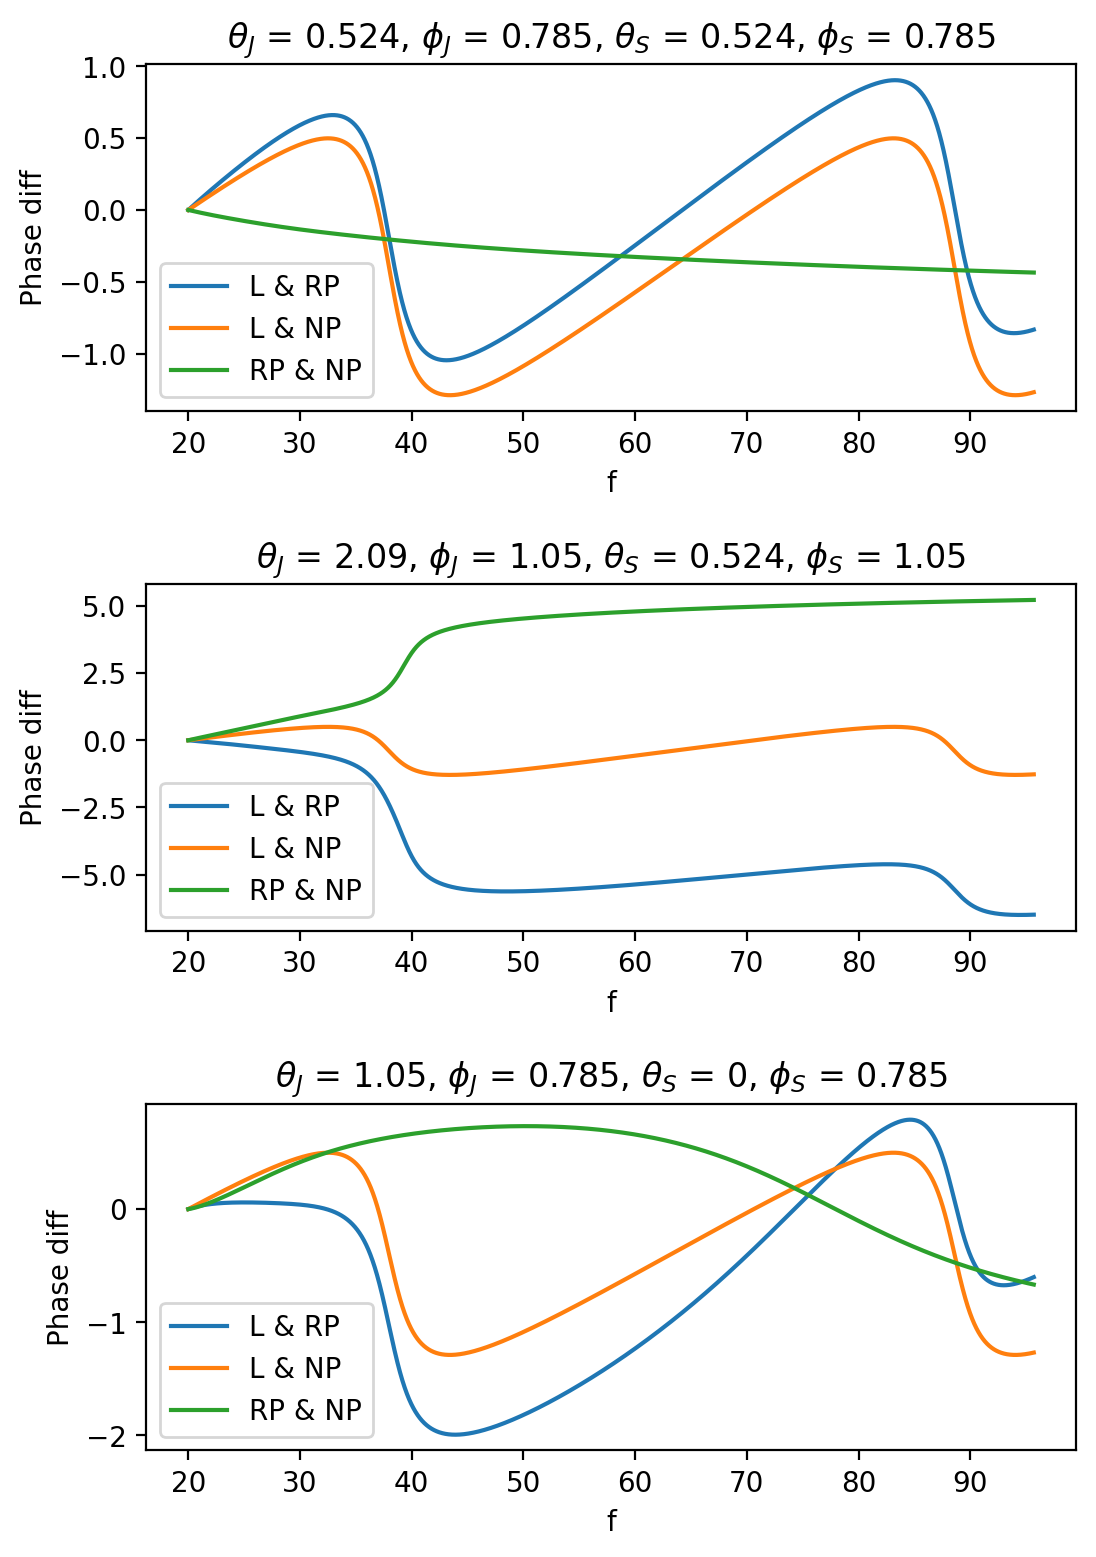

In [71]:
lensing_params, RP_params, NP_params = set_to_params(
    lensing_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
mcz = 20
MLz = 2000
lensing_params["MLz"] = MLz * solar_mass
lensing_params["mcz"] = mcz * solar_mass
RP_params["mcz"] = mcz * solar_mass
NP_params["mcz"] = mcz * solar_mass

# using Saif's choice of sky locations
phase_diff_all(sky_locs_J_S, sky_locs_S_S)

In [120]:
# plot h_comparison_all and phase_diff_all side by side


def h_phase_diff_all(sky_locs_J, sky_locs_S):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, ((theta_J, phi_J), (theta_S, phi_S)) in enumerate(
        zip(sky_locs_J, sky_locs_S)
    ):
        # set lensed, RP, and NP to same location
        lensing_params["theta_L"] = RP_params["theta_J"] = NP_params["theta_J"] = (
            theta_J
        )
        lensing_params["phi_L"] = RP_params["phi_J"] = NP_params["phi_J"] = phi_J
        lensing_params["theta_S"] = RP_params["theta_S"] = NP_params["theta_S"] = (
            theta_S
        )
        lensing_params["phi_S"] = RP_params["phi_S"] = NP_params["phi_S"] = phi_S

        # lensed waveform
        lensing_inst = LensingGeo(lensing_params)
        f_min = 20
        f_cut_L = lensing_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lensing_inst.strain(f_range_L)
        phase_L = np.unwrap(np.angle(lensed_strain))

        # RP waveform
        RP_inst = Precessing(RP_params)
        f_cut_RP = RP_inst.f_cut()
        f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
        RP_strain = RP_inst.strain(f_range_RP)
        phase_RP = np.unwrap(np.angle(RP_strain))

        # NP waveform
        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        # set plot colors based on sky location
        color = ["#1f77b4", "#ff7f0e", "#2ca02c"]

        # left column: h_comparison_all
        axes[r, 0].loglog(
            f_range_L, np.abs(lensed_strain), label="L", ls="-", color=color[r]
        )
        axes[r, 0].loglog(
            f_range_RP, np.abs(RP_strain), label="RP", ls="--", color=color[r]
        )
        axes[r, 0].loglog(
            f_range_NP, np.abs(NP_strain), label="NP", ls=":", color=color[r]
        )
        axes[r, 0].set_xlabel("f")
        axes[r, 0].set_ylabel("|h|")
        axes[r, 0].set_title(
            r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            )
        )
        axes[r, 0].legend()

        # right column: phase_diff_all
        phase_diff_L_RP = phase_L - phase_RP
        phase_diff_L_RP = phase_diff_L_RP - phase_diff_L_RP[0]
        axes[r, 1].plot(
            f_range_RP, phase_diff_L_RP, label="L & RP", ls="-", color=color[r]
        )

        phase_diff_L_NP = phase_L - phase_NP
        phase_diff_L_NP = phase_diff_L_NP - phase_diff_L_NP[0]
        axes[r, 1].plot(
            f_range_NP, phase_diff_L_NP, label="L & NP", ls="--", color=color[r]
        )

        phase_diff_RP_NP = phase_RP - phase_NP
        phase_diff_RP_NP = phase_diff_RP_NP - phase_diff_RP_NP[0]
        axes[r, 1].plot(
            f_range_NP, phase_diff_RP_NP, label="RP & NP", ls=":", color=color[r]
        )

        axes[r, 1].set_xlabel("f")
        axes[r, 1].set_ylabel("Phase diff")
        axes[r, 1].set_title(
            r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            )
        )
        axes[r, 1].legend()

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_22604/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


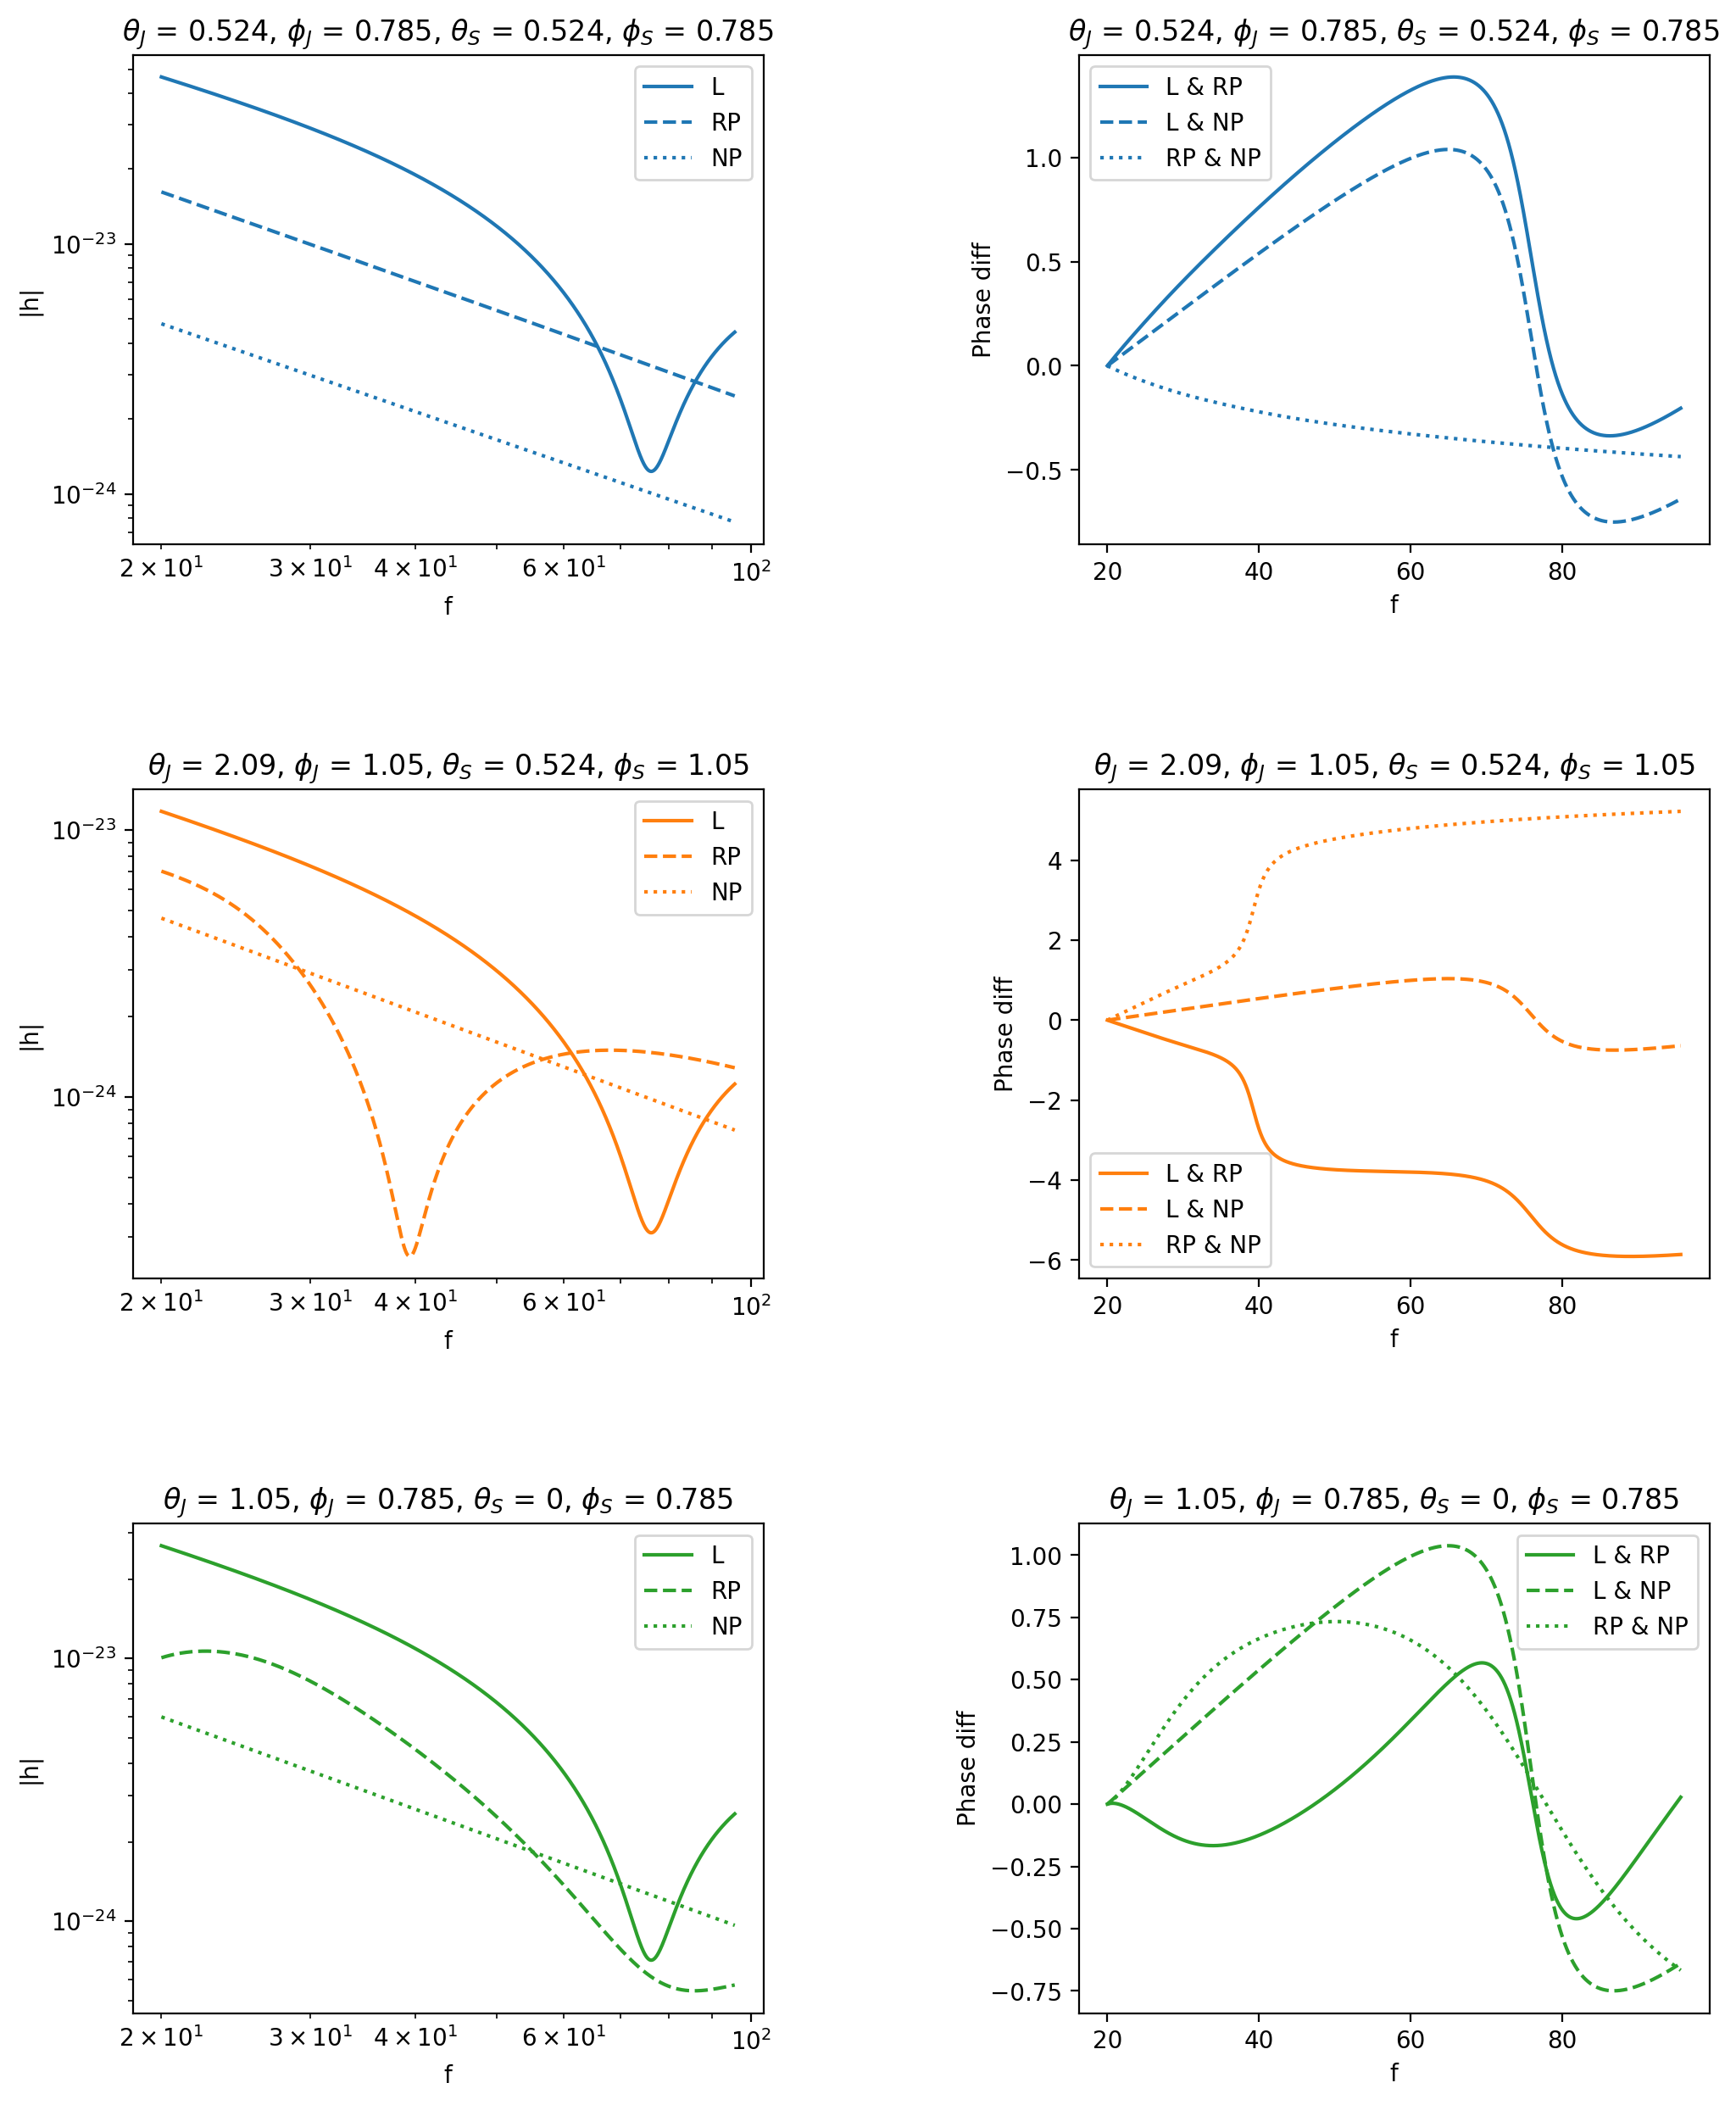

In [121]:
lensing_params, RP_params, NP_params = set_to_params(
    lensing_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
lensing_params["MLz"] = 1000 * solar_mass
lensing_params["mcz"] = 20 * solar_mass
RP_params["mcz"] = 20 * solar_mass
NP_params["mcz"] = 20 * solar_mass

# using Saif's choice of sky locations
h_phase_diff_all(sky_locs_J_S, sky_locs_S_S)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_22604/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


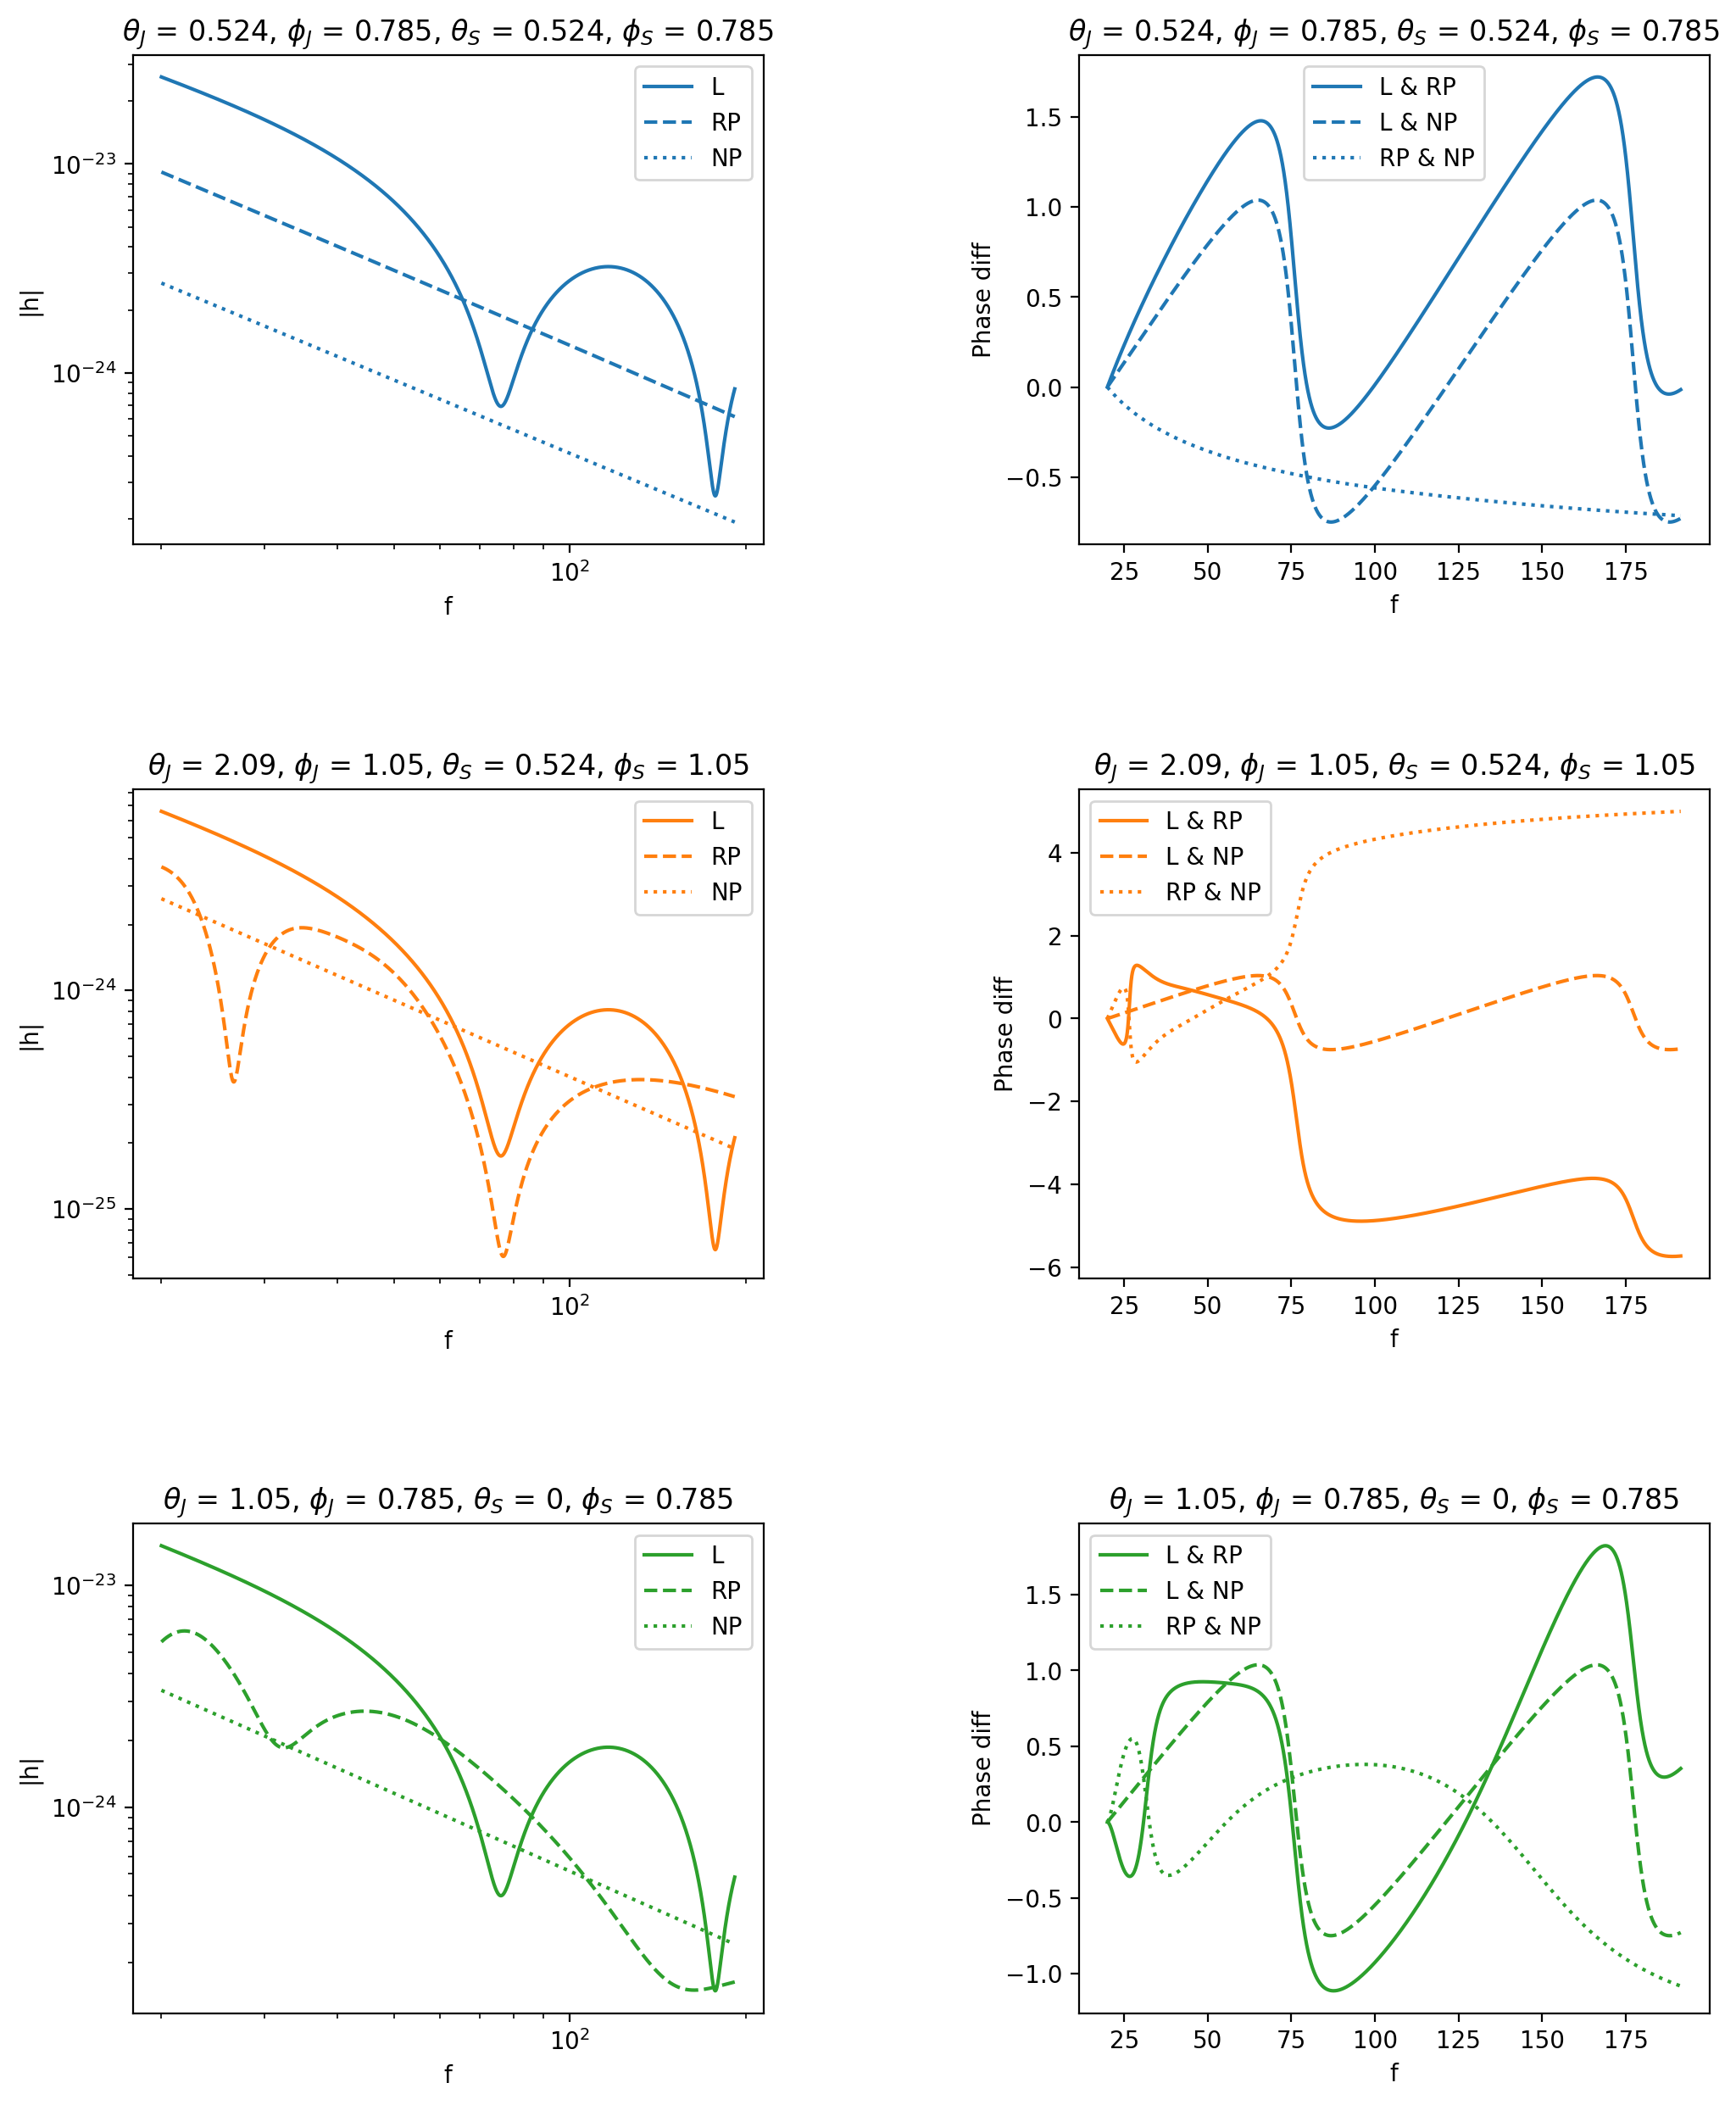

In [122]:
lensing_params, RP_params, NP_params = set_to_params(
    lensing_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
lensing_params["MLz"] = 1000 * solar_mass
lensing_params["mcz"] = 10 * solar_mass
RP_params["mcz"] = 10 * solar_mass
NP_params["mcz"] = 10 * solar_mass

# using Saif's choice of sky locations
h_phase_diff_all(sky_locs_J_S, sky_locs_S_S)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_22604/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


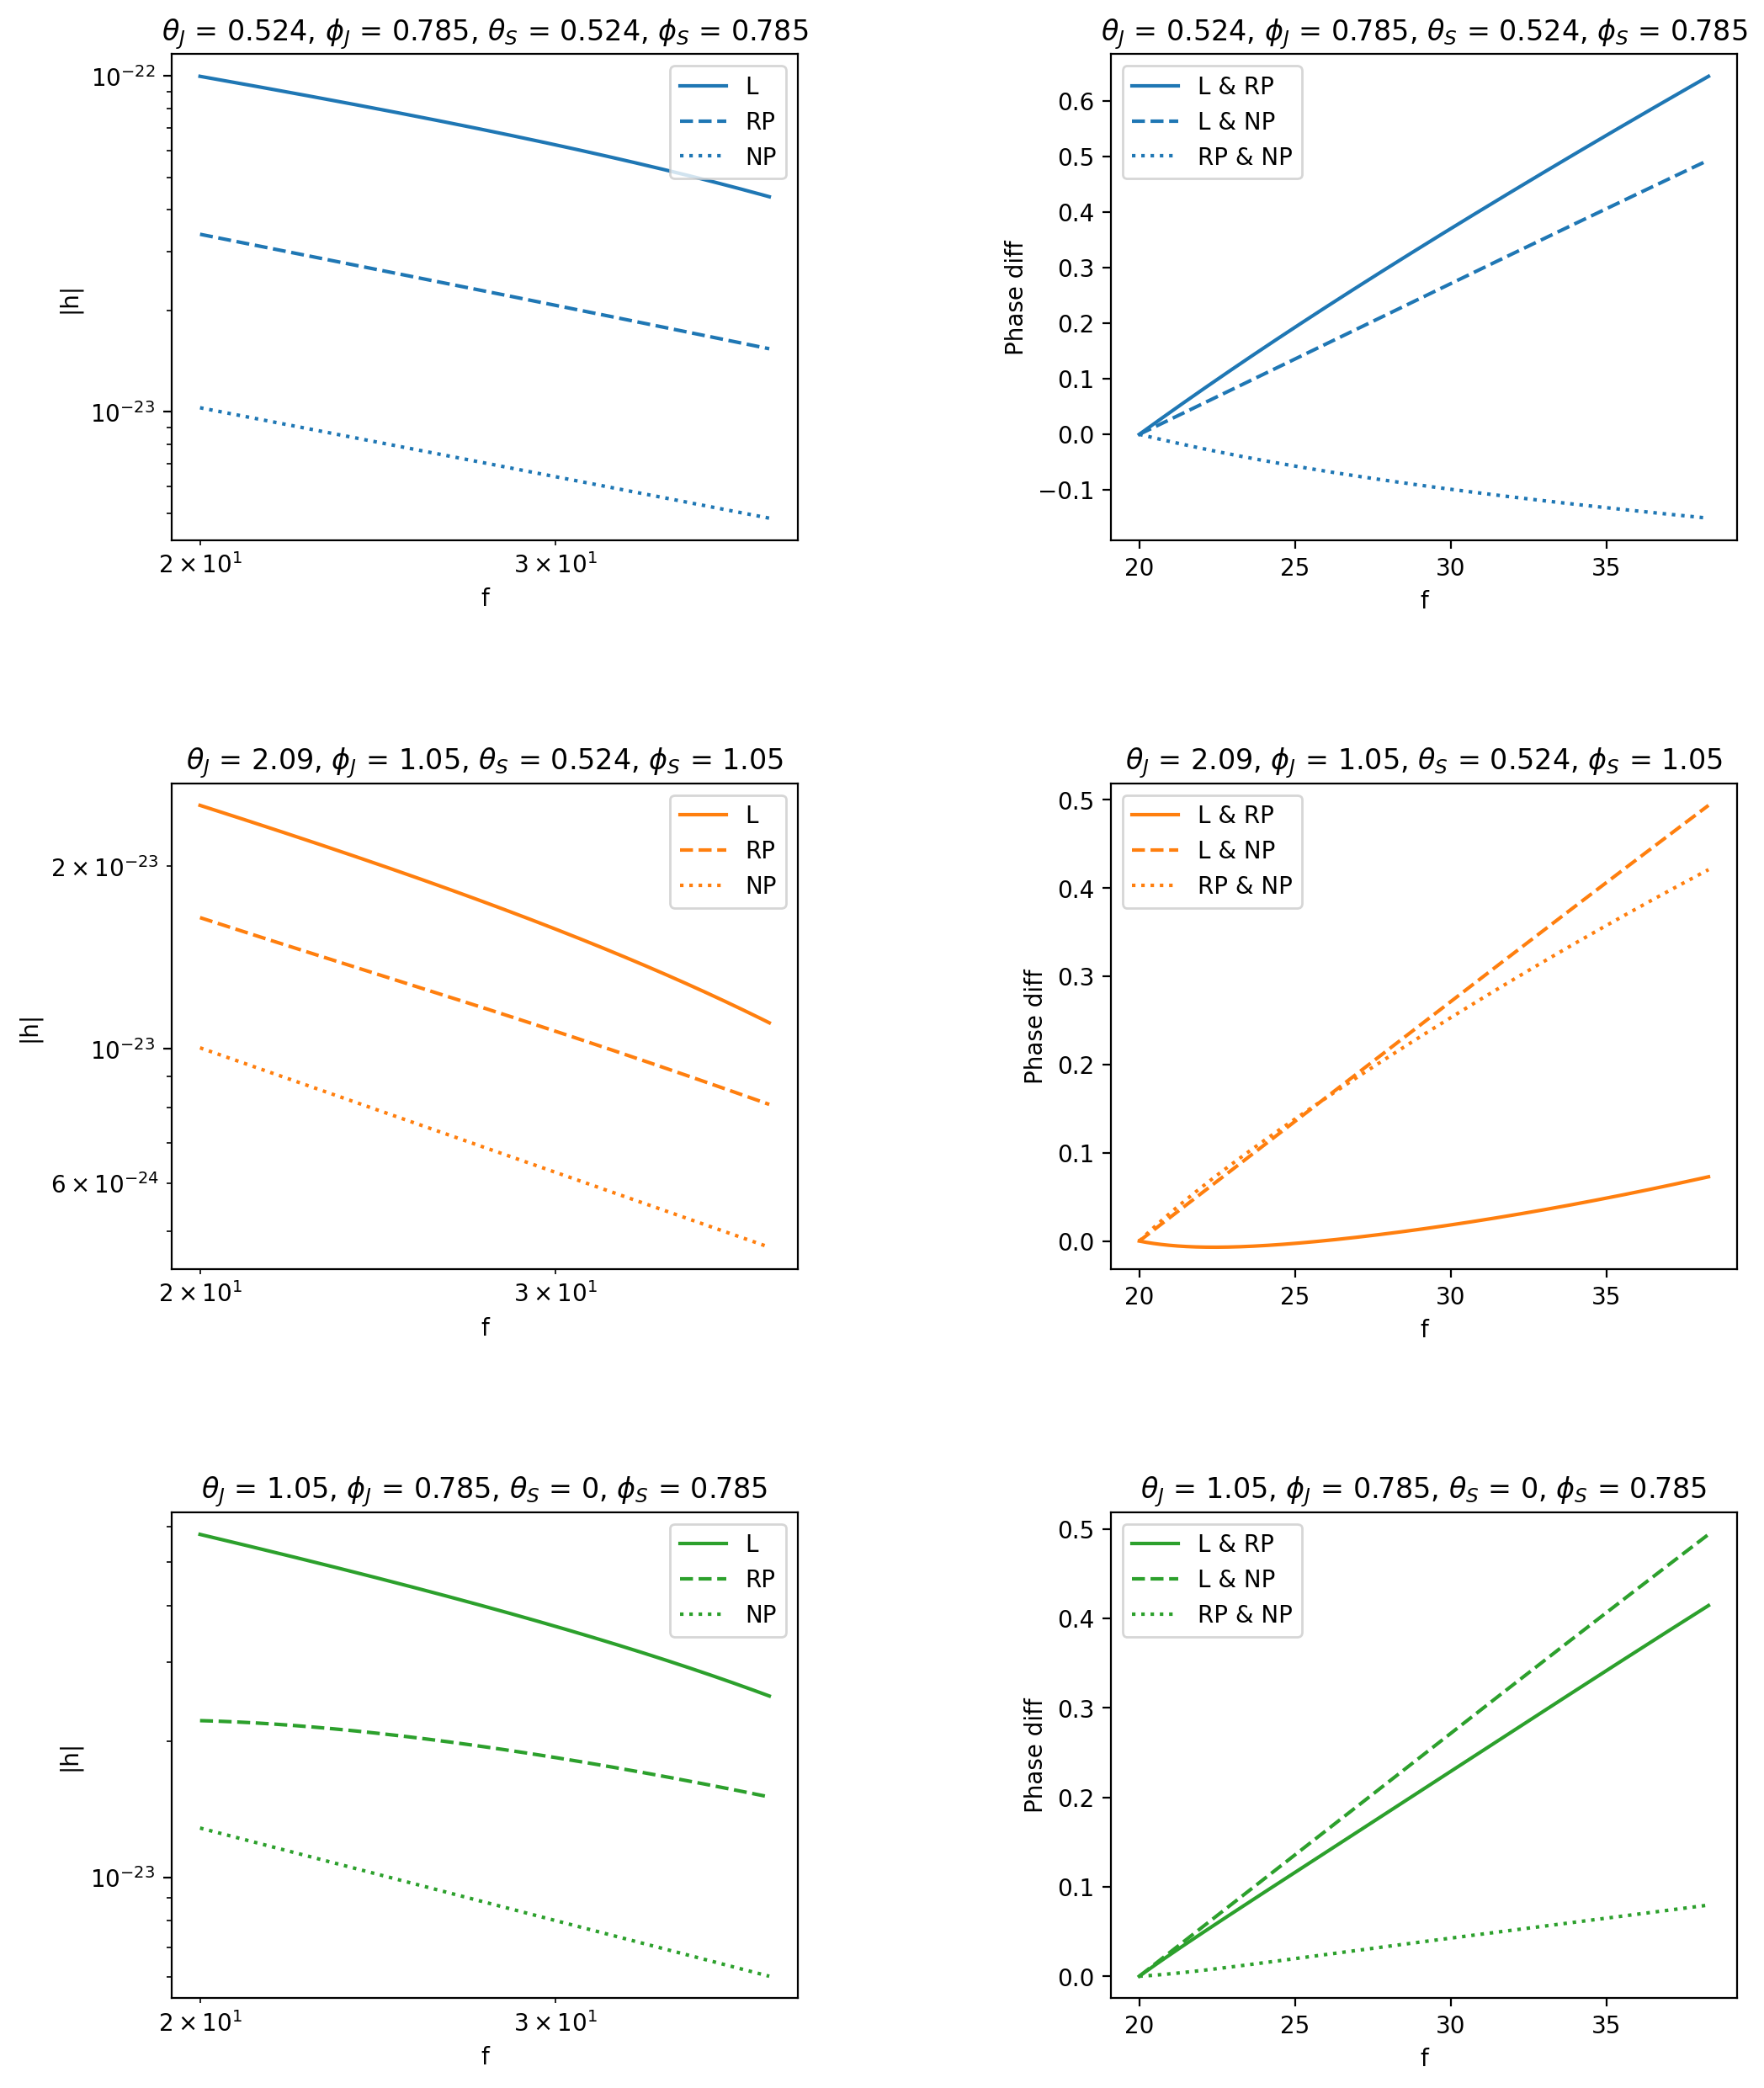

In [123]:
lensing_params, RP_params, NP_params = set_to_params(
    lensing_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
lensing_params["MLz"] = 1000 * solar_mass
lensing_params["mcz"] = 50 * solar_mass
RP_params["mcz"] = 50 * solar_mass
RP_params["theta_tilde"] = 4.0
RP_params["omega_tilde"] = 1.0
# RP_params["gamma_P"] = np.pi / 3
NP_params["mcz"] = 50 * solar_mass

# using Saif's choice of sky locations
h_phase_diff_all(sky_locs_J_S, sky_locs_S_S)